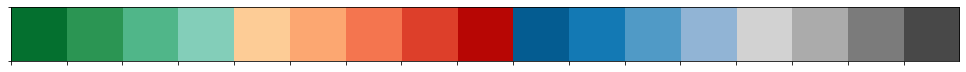

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# try different palette for plotting
# sns.set_palette(sns.color_palette("Paired", 20))
# sns.set_palette(sns.diverging_palette(255, 133, l=60, n=16, center="dark"))
colors3 = ["#9d6d00", "#903ee0", "#11dc79", "#f568ff", "#419500", "#013fb0", 
          "#f2b64c", "#007ae4", "#ff905a", "#33d3e3", "#9e003a", "#019085", 
          "#950065", "#afc98f", "#ff9bfa", "#83221d", "#01668a", "#ff7c7c", 
          "#643561", "#75608a"]
palette1 = sns.color_palette("BuGn", 6)[::-1][:4] \
           + sns.color_palette("OrRd", 6)[1:] \
           + sns.color_palette("PuBu", 6)[::-1][:-2] \
           + sns.color_palette("RdGy", 10)[6:]
sns.set_palette(palette1)
sns.palplot(sns.color_palette())

In [2]:
# source https://github.com/CSSEGISandData/COVID-19/
# transpose matrices for better data handling
! curl https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv > ../external_data/dpc-covid19-ita-regioni.csv

# confirmed COVID-19 positive cases for Italy
data = pd.read_csv("../external_data/dpc-covid19-ita-regioni.csv")
data.head(10)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 49122  100 49122    0     0  49122      0  0:00:01 --:--:--  0:00:01  113k


,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
0,2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,5
1,2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0
2,2020-02-24 18:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,1
3,2020-02-24 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,1
4,2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,10
5,2020-02-24 18:00:00,ITA,8,Emilia Romagna,44.494367,11.341721,10,2,12,6,18,18,0,0,18,148
6,2020-02-24 18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,58
7,2020-02-24 18:00:00,ITA,12,Lazio,41.892770,12.483667,1,1,2,0,2,2,1,0,3,124
8,2020-02-24 18:00:00,ITA,7,Liguria,44.411493,8.932699,0,0,0,0,0,0,0,0,0,1
9,2020-02-24 18:00:00,ITA,3,Lombardia,45.466794,9.190347,76,19,95,71,166,166,0,6,172,1463


In [3]:
# region_names = data["denominazione_regione"].unique()
dates = data["data"].unique()
conf = pd.DataFrame(columns = ["data"])
conf["data"] = dates
deaths = pd.DataFrame(columns = ["data"])
deaths["data"] = dates
tests = pd.DataFrame(columns = ["data"])
tests["data"] = dates

In [4]:
for name, group in data.groupby('denominazione_regione'):
    conf = conf.merge(group[["totale_casi","data"]], on='data', how='outer', suffixes=('_1', '_2'))
    conf.rename(columns={"totale_casi": name}, inplace=True)
    deaths = deaths.merge(group[["deceduti","data"]], on='data', how='outer', suffixes=('_1', '_2'))
    deaths.rename(columns={"deceduti": name}, inplace=True)
    tests = tests.merge(group[["tamponi","data"]], on='data', how='outer', suffixes=('_1', '_2'))
    tests.rename(columns={"tamponi": name}, inplace=True)
    
conf.set_index('data', inplace=True)
deaths.set_index('data', inplace=True)
tests.set_index('data', inplace=True)
conf.tail()

,Abruzzo,Basilicata,Calabria,Campania,Emilia Romagna,Friuli Venezia Giulia,Lazio,Liguria,Lombardia,Marche,...,P.A. Bolzano,P.A. Trento,Piemonte,Puglia,Sardegna,Sicilia,Toscana,Umbria,Valle d'Aosta,Veneto
data,,,,,,,,,,,,,,,,,,,,,
2020-03-16 17:00:00,176,12,89,400,3522,386,523,667,14649,1242,...,241,378,1516,230,107,213,866,164,105,2473
2020-03-17 17:00:00,229,20,114,460,3931,394,607,778,16220,1371,...,291,385,1897,340,117,237,1053,197,136,2704
2020-03-18 17:00:00,263,27,129,460,4525,462,724,887,17713,1568,...,376,455,2341,383,134,282,1330,247,165,3214
2020-03-19 17:00:00,385,37,169,652,5214,599,823,1059,19884,1737,...,436,523,2932,478,206,340,1482,334,215,3484
2020-03-20 17:00:00,449,52,207,749,5968,656,1008,1221,22264,1981,...,548,642,3461,581,293,408,1793,395,264,4031


In [5]:
# select only countries with > 200 positive COVID-19 cases
selected_columns = conf.max()>200
conf = conf.loc[:,selected_columns]

# sort columns by total number of positive cases
# # conf = conf.sort_values(conf.last_valid_index(), axis=1, ascending=False)
# deaths = deaths.sort_values(deaths.last_valid_index(), axis=1, ascending=False)
# recover = recover.sort_values(recover.last_valid_index(), axis=1, ascending=False)

In [6]:
# latest number of cases by country
print(conf.max())

Abruzzo                    449
Calabria                   207
Campania                   749
Emilia Romagna            5968
Friuli Venezia Giulia      656
Lazio                     1008
Liguria                   1221
Lombardia                22264
Marche                    1981
P.A. Bolzano               548
P.A. Trento                642
Piemonte                  3461
Puglia                     581
Sardegna                   293
Sicilia                    408
Toscana                   1793
Umbria                     395
Valle d'Aosta              264
Veneto                    4031
dtype: int64


In [7]:
# remove Cruise Ship
# conf.drop(list(conf.filter(regex = "Cruise")), inplace=True)
# deaths.drop(list(conf.filter(regex = "Cruise")), inplace=True)
# deaths.drop(list(conf.filter(regex = "Cruise")), inplace=True)

Text(0, 0.5, 'Total number of positive COVID-19 cases (linear scale)')

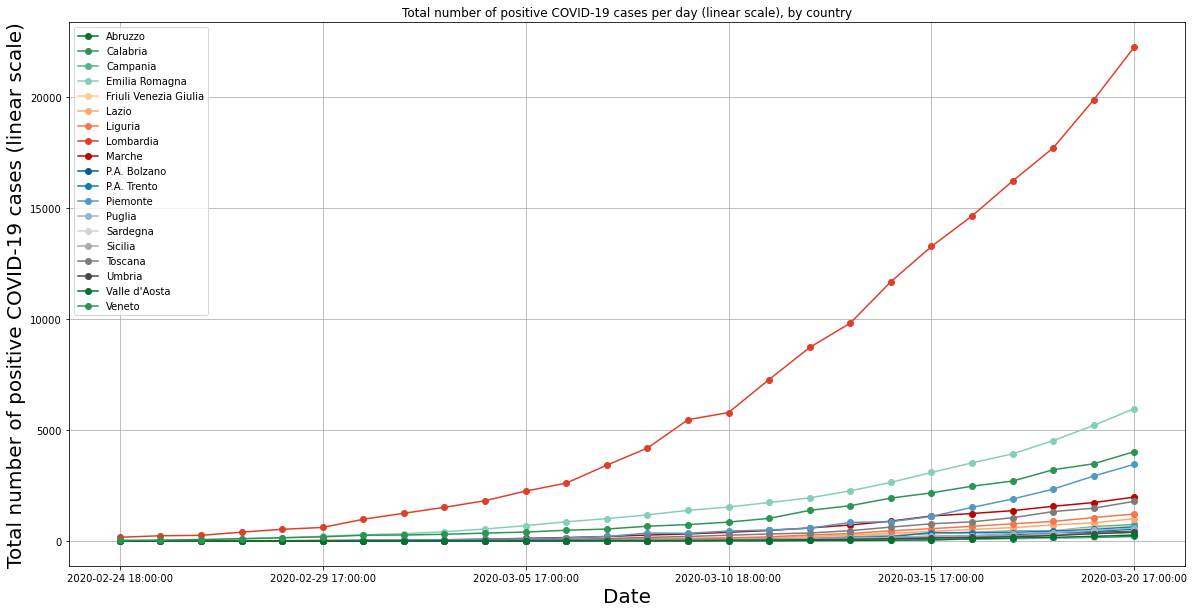

In [8]:
#show total number of positive cases
plot1 = conf[conf.columns.values].plot(grid=True, marker='o',
         title='Total number of positive COVID-19 cases per day (linear scale), by country', figsize = (20,10))
plot1.set_xlabel("Date", fontsize=20)
plot1.set_ylabel("Total number of positive COVID-19 cases (linear scale)", fontsize=20)

Text(0, 0.5, 'Total number of positive COVID-19 cases (log scale)')

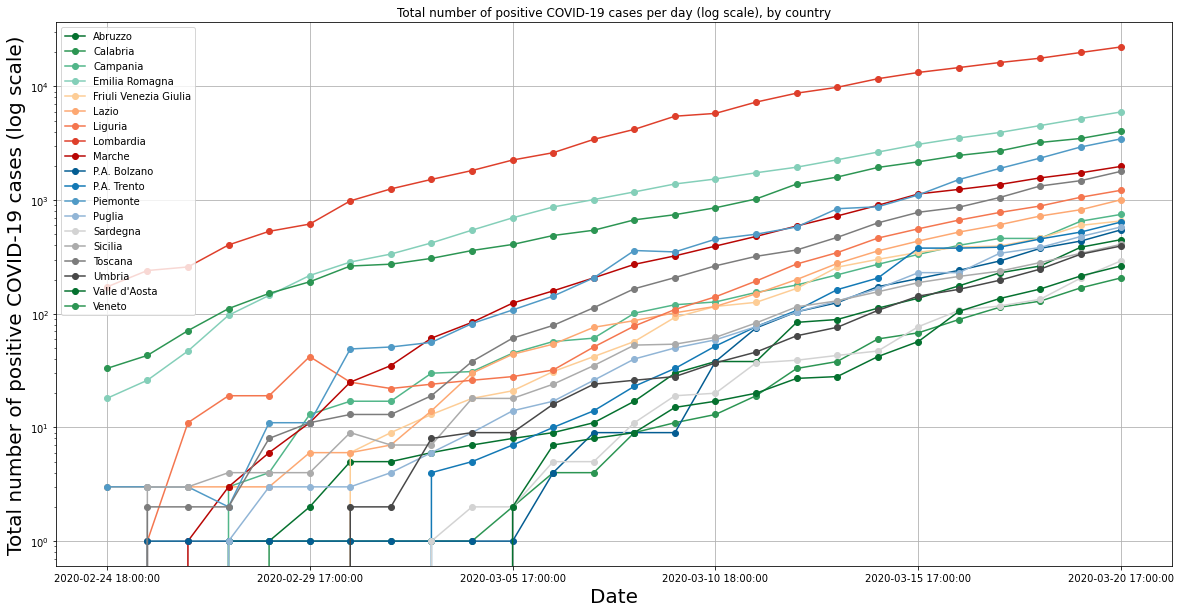

In [9]:
#show total number of positive cases
plot1 = conf[conf.columns.values].plot(logy=True, grid=True, marker='o',
         title='Total number of positive COVID-19 cases per day (log scale), by country', figsize = (20,10))
plot1.set_xlabel("Date", fontsize=20)
plot1.set_ylabel("Total number of positive COVID-19 cases (log scale)", fontsize=20)

Text(0, 0.5, 'Total number of COVID-19 death cases (linear scale)')

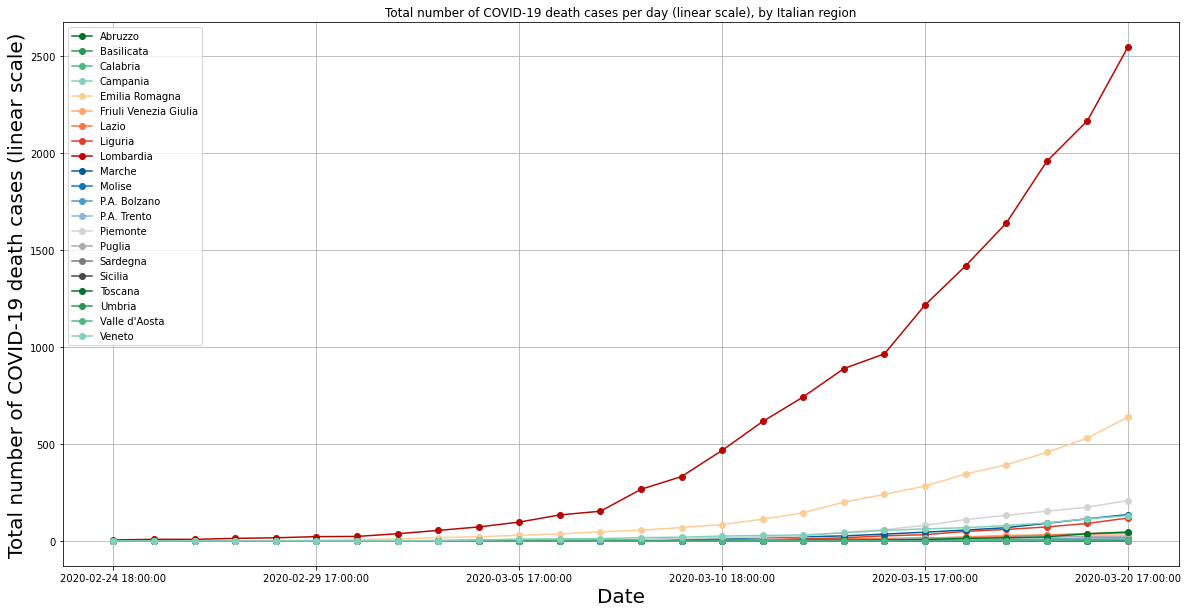

In [10]:
#show total number of positive cases
plot1 = deaths[deaths.columns.values].plot(grid=True, marker='o',
         title='Total number of COVID-19 death cases per day (linear scale), by Italian region', figsize = (20,10))
plot1.set_xlabel("Date", fontsize=20)
plot1.set_ylabel("Total number of COVID-19 death cases (linear scale)", fontsize=20)

(0.0, 0.15)

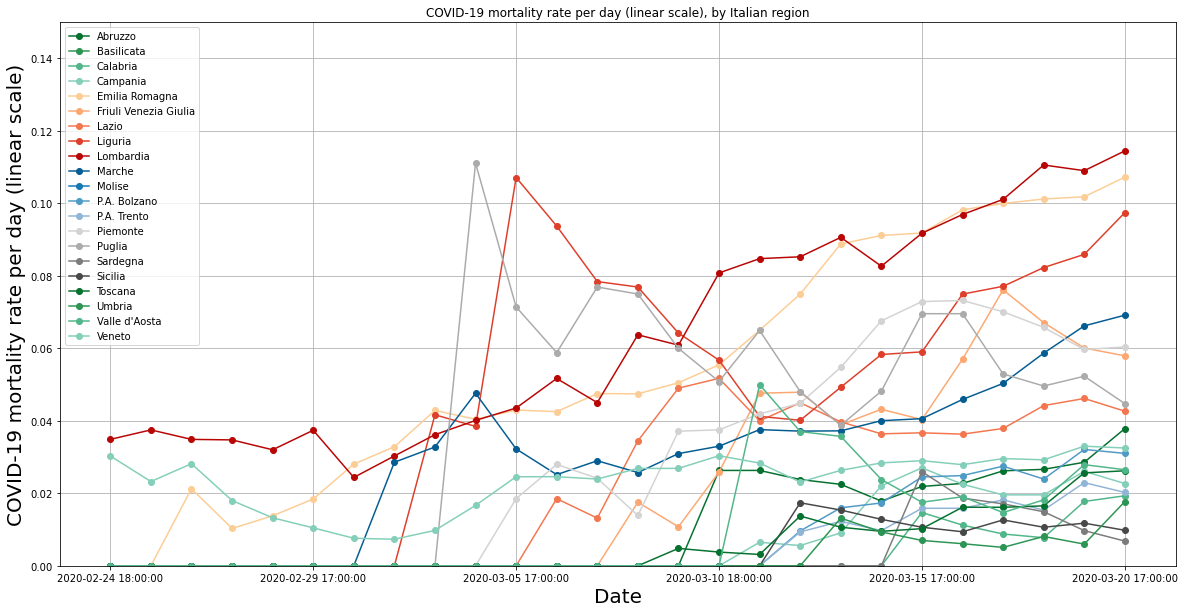

In [11]:
mortality = deaths.divide(conf.replace(0, 1))

#show total number of death cases
plot1 = mortality[mortality.columns.values].plot(grid=True, marker='o',
         title='COVID-19 mortality rate per day (linear scale), by Italian region', figsize = (20,10))
plot1.set_xlabel("Date", fontsize=20)
plot1.set_ylabel("COVID-19 mortality rate per day (linear scale)", fontsize=20)
plot1.set_ylim(0,0.15)

In [12]:
# retrieve population information
# source http://dati-censimentopopolazione.istat.it/Index.aspx?lang=en
population = pd.read_csv("../external_data/DICA_POP_RESPRE_Data_9d65c5fb-6eaa-413c-a013-61a8ad3bce06.csv", encoding = "ISO-8859-1")

In [13]:
# rename population country names that don't match COVID-19 data
population = population.replace('Emilia-Romagna', 'Emilia Romagna')
population = population.replace('Friuli-Venezia Giulia', 'Friuli Venezia Giulia')

In [14]:
population = population[(population["Territory"].isin(set(list(conf.columns.values)))) & 
                       (population["Data type"] == "present population (absolute values)") &
                       (population["Gender"] == "total") &
                       (population["Age"] == "total") ]
population = population[["Territory","0"]].transpose()
population.columns = population.iloc[0]
population = population.iloc[1:]
population.head()

Territory,Piemonte,Liguria,Lombardia,Veneto,Friuli Venezia Giulia,Emilia Romagna,Toscana,Umbria,Marche,Lazio,Abruzzo,Campania,Puglia,Calabria,Sicilia,Sardegna
0,4.39384e+06,1.60573e+06,9.80737e+06,4.95495e+06,1.23702e+06,4.44907e+06,3.76008e+06,917784,1.59126e+06,5.67948e+06,1.31404e+06,5.84041e+06,4.09045e+06,1.93658e+06,5.1511e+06,1.64133e+06


In [15]:
# create copy
conf_no_norm = conf.copy()

# concatenate dataset
conf = pd.concat([population,conf])
conf.head()

,Piemonte,Liguria,Lombardia,Veneto,Friuli Venezia Giulia,Emilia Romagna,Toscana,Umbria,Marche,Lazio,Abruzzo,Campania,Puglia,Calabria,Sicilia,Sardegna,P.A. Bolzano,P.A. Trento,Valle d'Aosta
0,4.39384e+06,1.60573e+06,9.80737e+06,4.95495e+06,1.23702e+06,4.44907e+06,3.76008e+06,917784,1.59126e+06,5.67948e+06,1.31404e+06,5.84041e+06,4.09045e+06,1.93658e+06,5.1511e+06,1.64133e+06,NaN,NaN,NaN
2020-02-24 18:00:00,3,0,172,33,0,18,0,0,0,3,0,0,0,0,0,0,0.0,0.0,0.0
2020-02-25 18:00:00,3,1,240,43,0,26,2,0,0,3,0,0,0,0,3,0,1.0,0.0,0.0
2020-02-26 18:00:00,3,11,258,71,0,47,2,0,1,3,0,0,0,0,3,0,1.0,0.0,0.0
2020-02-27 18:00:00,2,19,403,111,0,97,2,0,3,3,1,3,1,0,4,0,1.0,0.0,0.0


In [16]:
# divide cases rows by population/10/1e3 row to obtain number of cases per 1e4 persons
conf = conf.loc[:].div(conf.iloc[0][:]/10/1e3)

In [17]:
# remove population row
conf = conf.iloc[1:]
conf.dropna(axis=1, inplace=True)
conf.tail()

,Piemonte,Liguria,Lombardia,Veneto,Friuli Venezia Giulia,Emilia Romagna,Toscana,Umbria,Marche,Lazio,Abruzzo,Campania,Puglia,Calabria,Sicilia,Sardegna
2020-03-16 17:00:00,3.45029,4.15388,14.9367,4.99097,3.12039,7.91627,2.30314,1.78691,7.80511,0.920858,1.33938,0.684884,0.562285,0.459574,0.413504,0.65191
2020-03-17 17:00:00,4.31741,4.84515,16.5386,5.45717,3.18506,8.83556,2.80047,2.14647,8.61579,1.06876,1.74271,0.787616,0.831204,0.588668,0.460096,0.712836
2020-03-18 17:00:00,5.32792,5.52397,18.0609,6.48644,3.73477,10.1707,3.53716,2.69127,9.8538,1.27476,2.00145,0.787616,0.936327,0.666124,0.547456,0.816411
2020-03-19 17:00:00,6.67298,6.59514,20.2745,7.03135,4.84226,11.7193,3.94141,3.6392,10.9158,1.44908,2.92988,1.11636,1.16858,0.872674,0.660054,1.25508
2020-03-20 17:00:00,7.87694,7.60403,22.7013,8.1353,5.30305,13.414,4.76852,4.30384,12.4492,1.77481,3.41693,1.28244,1.42038,1.0689,0.792064,1.78514


Text(0, 0.5, "Number of positive COVID-19 cases per 10'000 people (linear scale)")

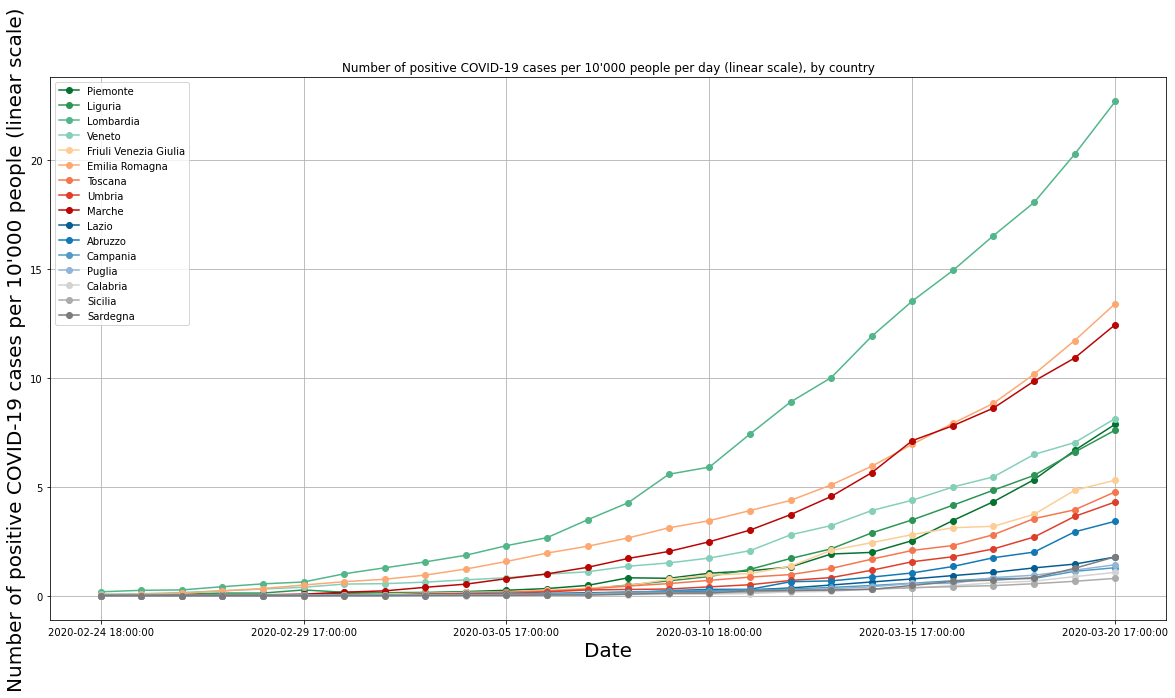

In [18]:
#show total number of positive cases
plot1 = conf[conf.columns.values].plot(grid=True, marker='o',
         title="Number of positive COVID-19 cases per 10'000 people per day (linear scale), by country", figsize = (20,10),)
plot1.set_xlabel("Date", fontsize=20)
plot1.set_ylabel("Number of positive COVID-19 cases per 10'000 people (linear scale)", fontsize=20)

Text(0, 0.5, "Number of positive COVID-19 cases per 10'000 people (log scale)")

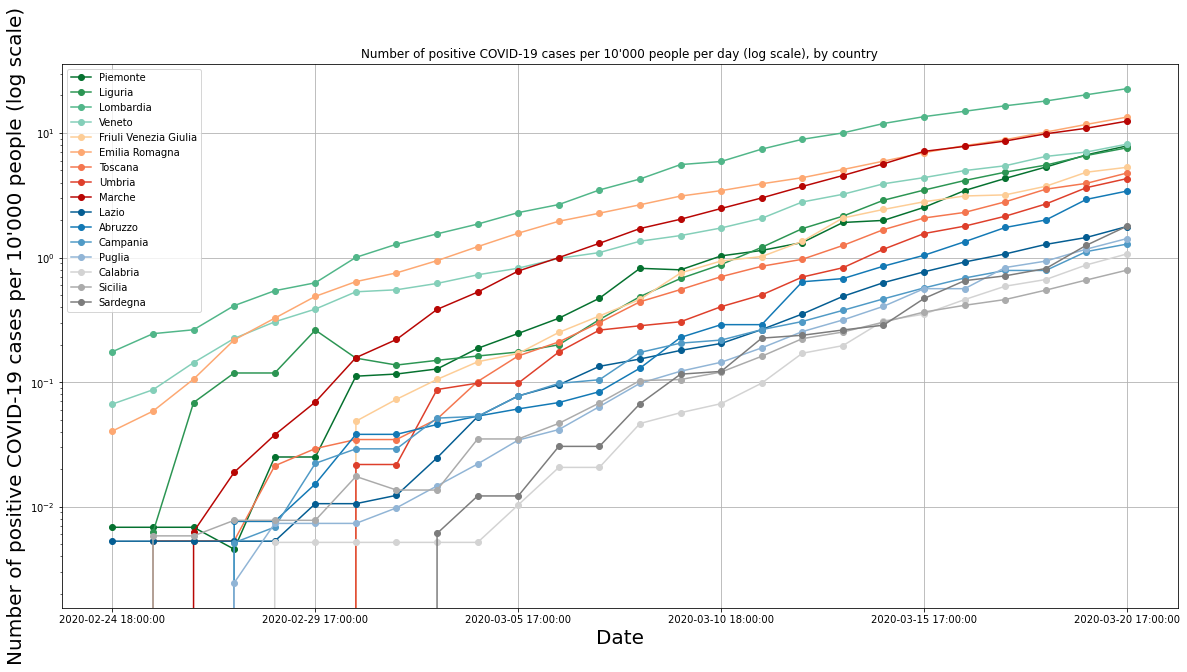

In [19]:
#show total number of positive cases
plot1 = conf[conf.columns.values].plot(logy=True, grid=True, marker='o',
         title="Number of positive COVID-19 cases per 10'000 people per day (log scale), by country", figsize = (20,10))
plot1.set_xlabel("Date", fontsize=20)
plot1.set_ylabel("Number of positive COVID-19 cases per 10'000 people (log scale)", fontsize=20)

Text(0, 0.5, 'Total number COVID-19 tests (linear scale)')

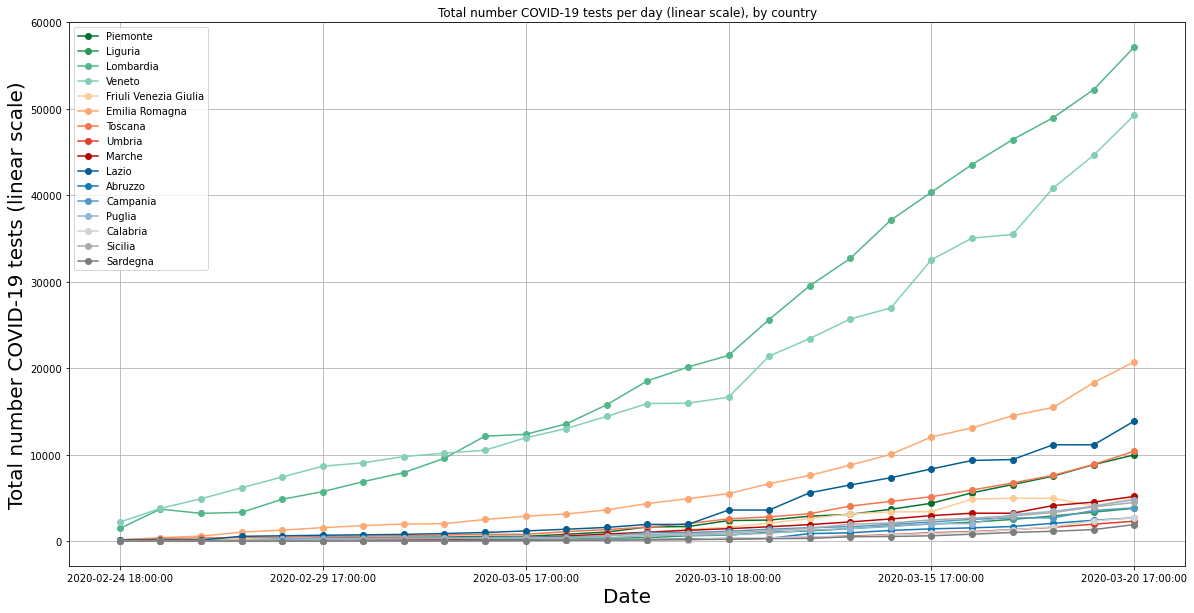

In [20]:
#show total number of tests
plot1 = tests[conf.columns.values].plot(grid=True, marker='o',
         title='Total number COVID-19 tests per day (linear scale), by country', figsize = (20,10))
plot1.set_xlabel("Date", fontsize=20)
plot1.set_ylabel("Total number COVID-19 tests (linear scale)", fontsize=20)

(0.0, 0.5)

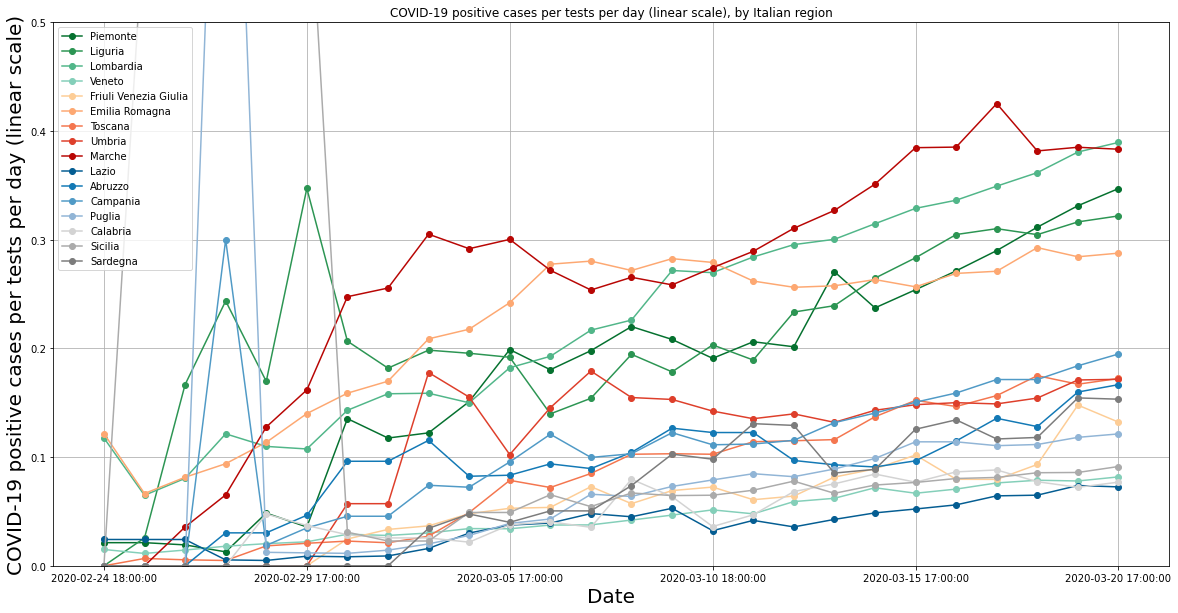

In [21]:
conf_per_test = conf_no_norm.divide(tests.replace(0, 1))

#show total number of positive cases per test
plot1 = conf_per_test[conf.columns.values].plot(grid=True, marker='o',
         title='COVID-19 positive cases per tests per day (linear scale), by Italian region', figsize = (20,10))
plot1.set_xlabel("Date", fontsize=20)
plot1.set_ylabel("COVID-19 positive cases per tests per day (linear scale)", fontsize=20)
plot1.set_ylim(0,0.5)

(0.0, 0.05)

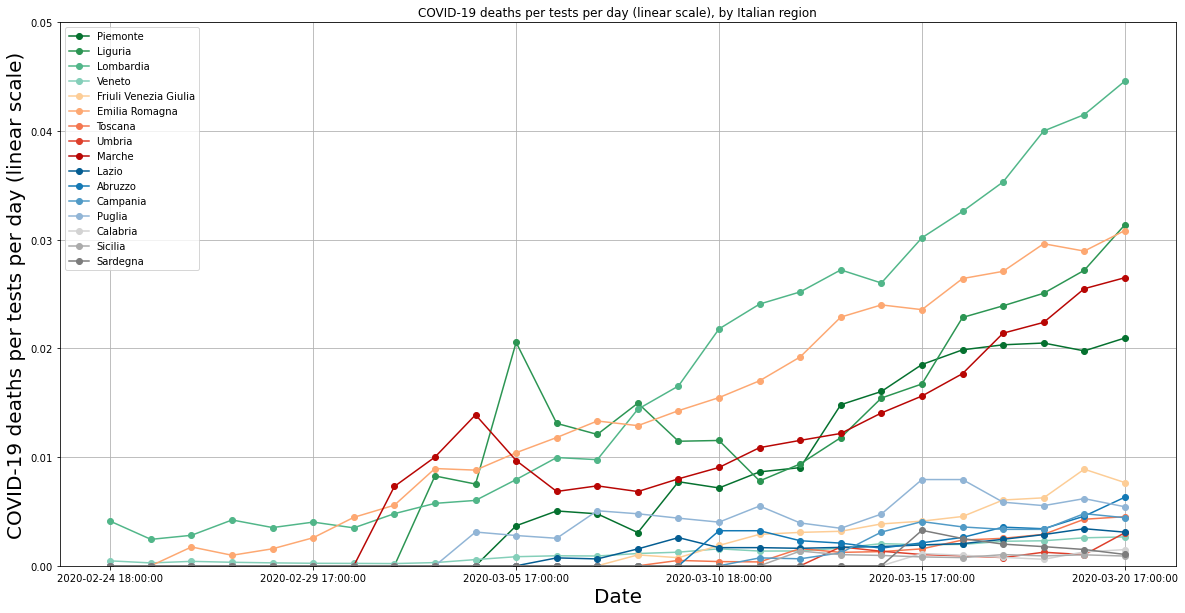

In [22]:
mortality_per_test = deaths.divide(tests.replace(0, 1))

#show total number of death cases
plot1 = mortality_per_test[conf.columns.values].plot(grid=True, marker='o',
         title='COVID-19 deaths per tests per day (linear scale), by Italian region', figsize = (20,10))
plot1.set_xlabel("Date", fontsize=20)
plot1.set_ylabel("COVID-19 deaths per tests per day (linear scale)", fontsize=20)
plot1.set_ylim(0,0.05)

(0.0, 0.2)

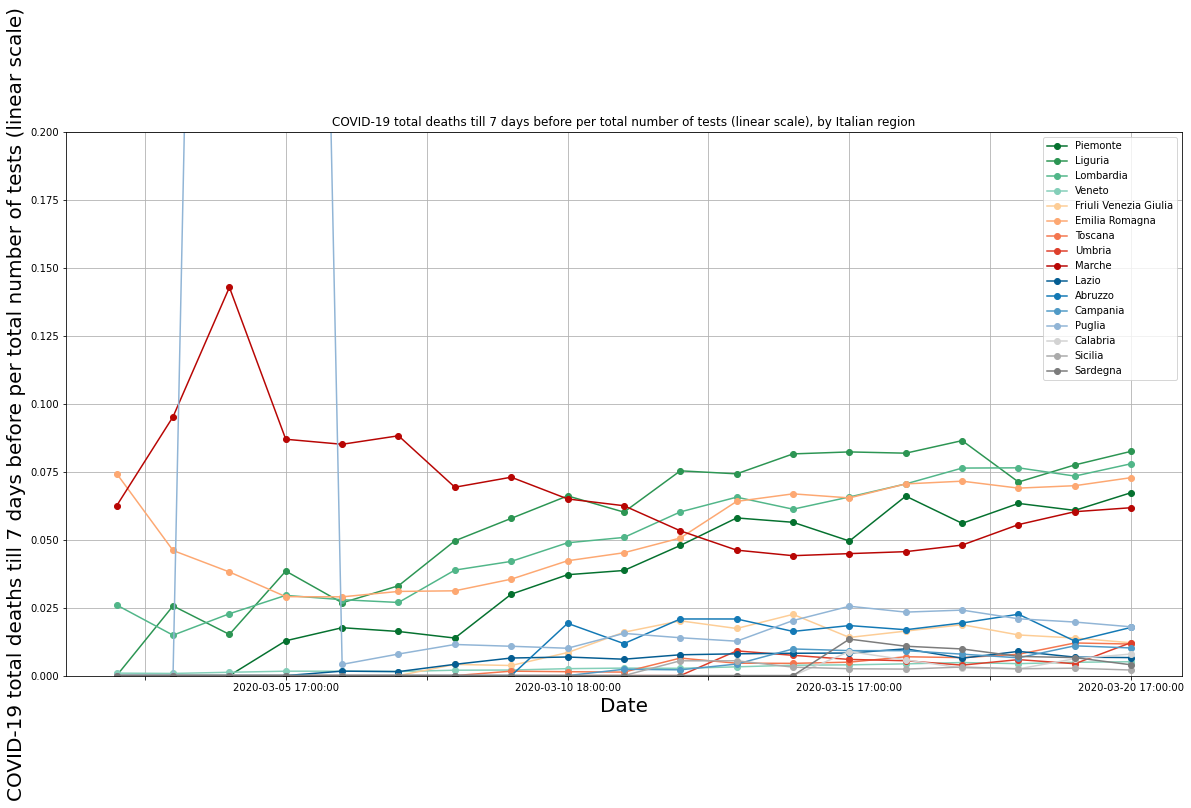

In [23]:
tests_7d_ago = tests[tests.columns.values].shift(7)
tests_7d_ago = tests_7d_ago.dropna()

mortality_after_7d_per_test = deaths.divide(tests_7d_ago.replace(0, 1))

#show total number of death cases
plot1 = mortality_after_7d_per_test[conf.columns.values].plot(grid=True, marker='o',
         title='COVID-19 total deaths till 7 days before per total number of tests (linear scale), by Italian region', figsize = (20,10))
plot1.set_xlabel("Date", fontsize=20)
plot1.set_ylabel("COVID-19 total deaths till 7 days before per total number of tests (linear scale)", fontsize=20)
plot1.set_ylim(0,0.2)

(0.0, 1.0)

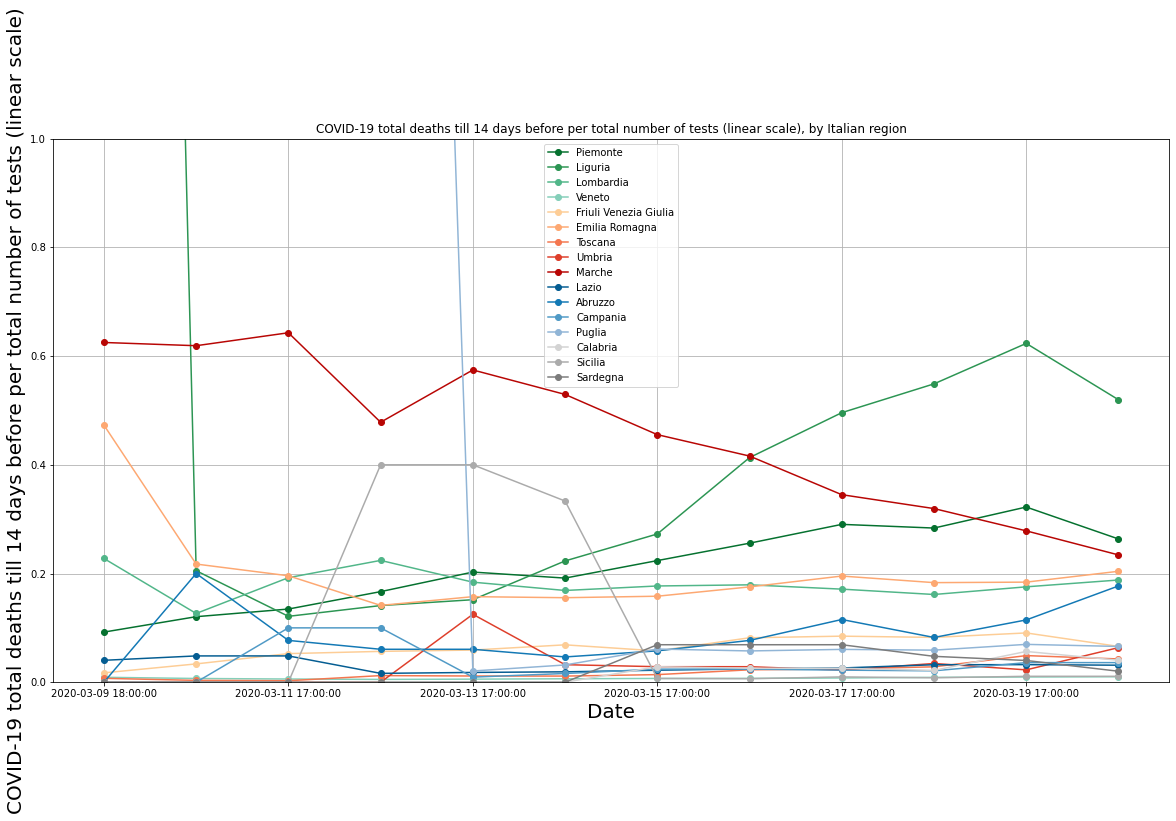

In [24]:
tests_14d_ago = tests[tests.columns.values].shift(14)
tests_14d_ago = tests_14d_ago.dropna()

mortality_after_14d_per_test = deaths.divide(tests_14d_ago.replace(0, 1))

#show total number of death cases
plot1 = mortality_after_14d_per_test[conf.columns.values].plot(grid=True, marker='o',
         title='COVID-19 total deaths till 14 days before per total number of tests (linear scale), by Italian region', figsize = (20,10))
plot1.set_xlabel("Date", fontsize=20)
plot1.set_ylabel("COVID-19 total deaths till 14 days before per total number of tests (linear scale)", fontsize=20)
plot1.set_ylim(0,1)